In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("loan_approval_dataset.csv")
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [3]:
df.value_counts(' loan_status')

 loan_status
 Approved    2656
 Rejected    1613
dtype: int64

In [4]:
df.columns = ['loan_id', 'no_of_dependents', 'education', 'self_employed','income_annum', 'loan_amount', 'loan_term', 'cibil_score','residential_assets_value', 'commercial_assets_value','luxury_assets_value', 'bank_asset_value', 'loan_status']

In [5]:
df.value_counts('loan_status')

loan_status
 Approved    2656
 Rejected    1613
dtype: int64

In [6]:
graduate = df[(df['education']=='Graduate')]

In [7]:
not_graducate = df[df['education']=='Not Graduate']

In [8]:
graduate.value_counts('loan_status')

Series([], dtype: int64)

In [9]:
not_graducate.value_counts('loan_status')

Series([], dtype: int64)

In [10]:
df['loan_status'].value_counts().keys()

Index([' Approved', ' Rejected'], dtype='object')

In [11]:
df['loan_status'] = df['loan_status'].map({' Approved':'Approved',' Rejected':'Rejected'})

In [12]:
df['education'].value_counts().keys()

Index([' Graduate', ' Not Graduate'], dtype='object')

In [13]:
df['education'] = df['education'].map({' Graduate':'Graduate',' Not Graduate':'Not Graduate'})

In [14]:
df['self_employed'].value_counts().keys()

Index([' Yes', ' No'], dtype='object')

In [15]:
df['self_employed'] = df['self_employed'].map({' Yes':'Yes',' No':'No'})

In [16]:
df[df['self_employed']=='Yes'].value_counts('loan_status')

loan_status
Approved    1338
Rejected     812
dtype: int64

In [17]:
df[df['self_employed']=='No'].value_counts('loan_status')

loan_status
Approved    1318
Rejected     801
dtype: int64

In [18]:
graduate['income_annum'].mean()

nan

In [19]:
graduate['loan_amount'].mean()

nan

In [20]:
not_graducate['income_annum'].mean()

nan

In [21]:
not_graducate['loan_amount'].mean()

nan

In [22]:
graduate[(graduate['self_employed'] == 'Yes') & (graduate['cibil_score']>=700) & (graduate['income_annum']>=df[df['self_employed'] == 'Yes']['income_annum'].mean())]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status


In [23]:
df2 = graduate[(graduate['self_employed'] == 'Yes') & (graduate['cibil_score']>=700) & (graduate['income_annum']>=df[df['self_employed'] == 'Yes']['income_annum'].mean())]

In [24]:
df2.value_counts(['loan_status'])

Series([], dtype: int64)

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


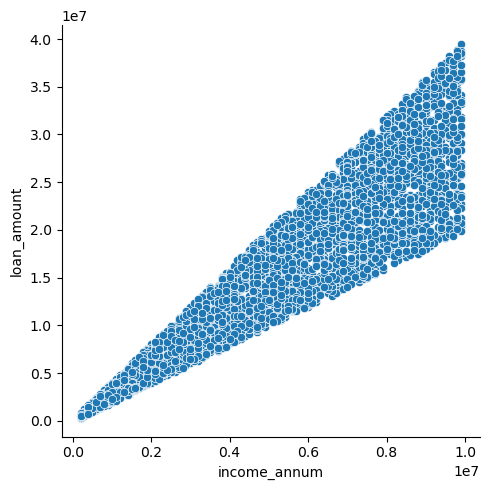

In [26]:
sns.relplot(x='income_annum' , y = 'loan_amount' , data = df)
plt.show()

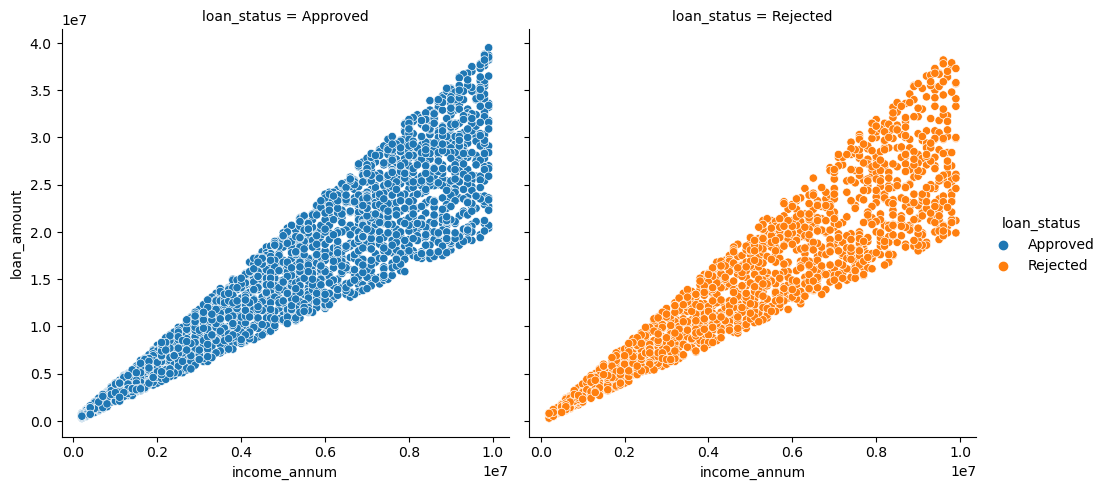

In [27]:
sns.relplot(x='income_annum' , y = 'loan_amount' , data = df , hue = 'loan_status' , col = 'loan_status')
plt.show()

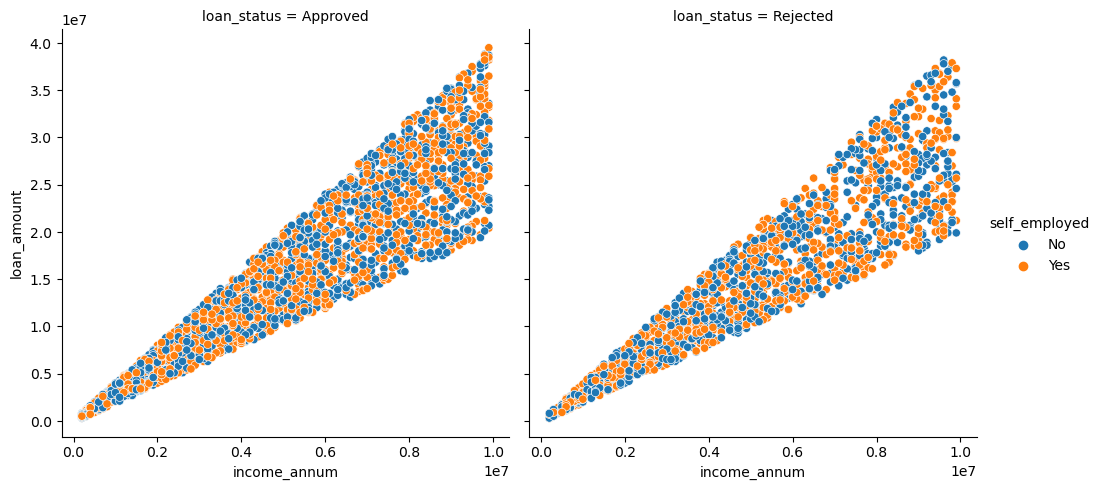

In [28]:
sns.relplot(x='income_annum' , y = 'loan_amount' , data = df , hue = 'self_employed' , col = 'loan_status')
plt.show()

In [29]:
df3 = pd.get_dummies(df , drop_first = 'if_binary').astype(int)
df3.head()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Not Graduate,self_employed_Yes,loan_status_Rejected
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0,0
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,1,1
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0,1
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0,1
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1,1


In [30]:
df3

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Not Graduate,self_employed_Yes,loan_status_Rejected
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0,0
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,1,1
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0,1
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0,1
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1000000,2300000,12,317,2800000,500000,3300000,800000,0,1,1
4265,4266,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1,1,0
4266,4267,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1,0,1
4267,4268,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,1,0,0


In [31]:
df3.drop('loan_id' , axis = 1 , inplace = True)

In [108]:
x = df3.drop('loan_status_Rejected' , axis = 1)

In [33]:
y = df3[['loan_status_Rejected']]

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
X = scaler.fit_transform(x)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train ,x_test,y_train,y_test = train_test_split(X,y , test_size = 0.2)

### Three layers in a `Artificial Neural Network`-
    1. Input Layer
    2. Hidden Layer
    3. Output layer

#### Input Layer
    No of neurons = No . of x_test features
    Activation Function - None

#### Hidden Layer
    Activation Function - relu
    For NLP - 
    Activatin Function - tanh

#### Outut Layer
    No. of Neurons
    1. For Binary classification - 1 neuron
    2. For rest - 
        No. of neurons = No. of output classes
    Activation function
    1. Binary Classification -> sigmoid
    2. Multiclass Classification -> softmax
    3. Linear regression -> relu or linear


### Loss Function 
#### Classification
    1. Binary Classification - Binary Crossentropy
    2. Multiclass Classification -
        1. Categorical Crossentropy
        2. Sparse Categorical Crossentopy
        

In [41]:
from tensorflow.keras.layers import Dense  # hidden layer
from tensorflow.keras.models import Sequential

In [42]:
ann_model = Sequential()

In [62]:
ann_model = Sequential() 
ann_model.add(Dense(units=64,activation='relu',input_dim=11))
ann_model.add(Dense(units=32,activation='relu'))
ann_model.add(Dense(units=12,activation='relu'))

ann_model.add(Dense(units=1,activation='sigmoid'))

ann_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [63]:
ann_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 12)                  │             396 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,257 (12.72 KB)

 Trainable params: 3,257 (12.72 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
history = ann_model.fit(x_train,y_train,epochs = 10, validation_data=(x_test , y_test))

Epoch 1/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9633 - loss: 0.0944 - val_accuracy: 0.9508 - val_loss: 0.1262
Epoch 2/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9722 - loss: 0.0861 - val_accuracy: 0.9520 - val_loss: 0.1188
Epoch 3/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9698 - loss: 0.0798 - val_accuracy: 0.9590 - val_loss: 0.1180
Epoch 4/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9721 - loss: 0.0778 - val_accuracy: 0.9614 - val_loss: 0.1042
Epoch 5/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9702 - loss: 0.0791 - val_accuracy: 0.9578 - val_loss: 0.1170
Epoch 6/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9729 - loss: 0.0701 - val_accuracy: 0.9567 - val_loss: 0.1000
Epoch 7/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9792 - loss: 0.0621 - val_accuracy: 0.9590 - val_loss: 0.1036
Epoch 8/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9733 - loss: 0.0647 - val_accuracy: 0.

In [67]:
ann_model.evaluate(x_train , y_train) # training

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9804 - loss: 0.0540


[0.04889744147658348, 0.9824304580688477]

In [68]:
ann_model.evaluate(x_test , y_test) # test

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9493 - loss: 0.1152


[0.09703689068555832, 0.9613583087921143]

In [76]:
import pandas as pd
history = pd.DataFrame(history.history)
history

AttributeError: 'DataFrame' object has no attribute 'history'

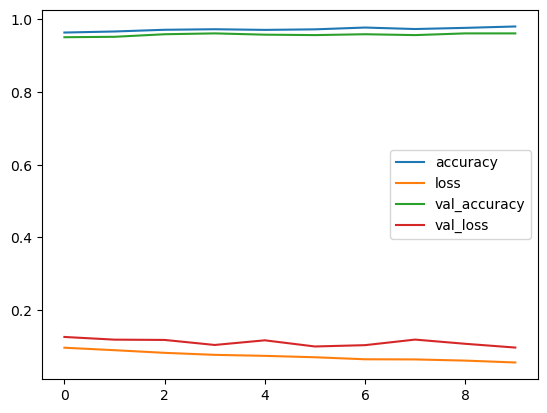

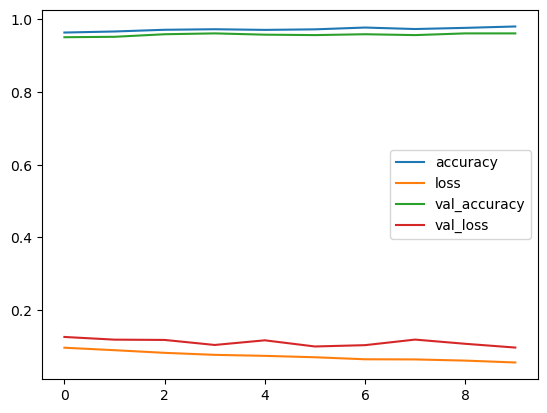

In [81]:
import matplotlib.pyplot as plt
history.plot()
plt.show()

In [82]:
prediction = ann_model.predict(x_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [92]:
# for i in range(len(prediction)):
#     if(prediction[i][0])>0.5:
#         prediction[i][0] = 1
#     else:
#         prediction[i][0] = 0

# predictions = (prediction>0.5).astype(int).ravel()

In [100]:
prediction = prediction.flatten()

In [114]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix

In [115]:
matrix = confusion_matrix(y_test , prediction ) # ACTUAL VALUE PREDICTED VALUE
matrix

array([[509,  19],
       [ 14, 312]], dtype=int64)

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

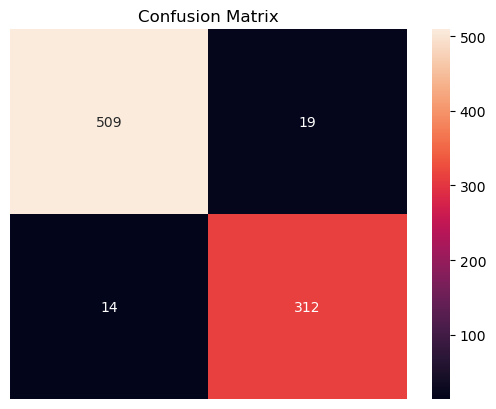

In [117]:
sns.heatmap(matrix , annot = True , fmt = 'd')
plt.title('Confusion Matrix')
plt.axis('off')
plt.show()

In [118]:
from sklearn.metrics import classification_report

In [119]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       528
           1       0.94      0.96      0.95       326

    accuracy                           0.96       854
   macro avg       0.96      0.96      0.96       854
weighted avg       0.96      0.96      0.96       854



In [123]:
# SAVE THE MODEL
ann_model.save("ann_model.h5")

In [125]:
import joblib
joblib.dump(scaler,'scaler.lb')

['scaler.lb']

In [126]:
from tensorflow.keras.models import load_model

In [127]:
model = load_model('ann_model.h5')